First Exploration Nov. 5 2020

In [70]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial

import datetime
from datetime import date
import datetime
import time


import scipy
import os, os.path
import itertools
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb


import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/Stop_the_Rot/')
import onion_core as oc

In [71]:
data_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/files_from_team/Columbia_Basin_Farm_A_red_onion_data/"

In [72]:
file_names = ["ABC_Correct.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A1.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A2.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A3.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A4.xlsx",
              "CLEANED (3) Real Time Soil Moisture data_Field A5.xlsx",]



In [74]:
A1 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[1], head_count=0)
A2 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[2], head_count=0)
A3 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[3], head_count=0)
A4 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[4], head_count=0)
A5 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[5], head_count=0)

In [75]:
A1.head(3)

,Date,Sensor1,Sensor2,Sensor3,Sensor4
0,2017-05-12 08:30:12.999997,0.71,0.43,0.34,0.49
1,2017-05-12 09:00:16.000001,0.71,0.43,0.34,0.49
2,2017-05-12 09:30:13.000000,0.71,0.43,0.34,0.49


In [76]:
A1.tail(3)

,Date,Sensor1,Sensor2,Sensor3,Sensor4
4940,2017-08-23 09:00:13.000003,0.3,0.36,0.4,0.49
4941,2017-08-23 09:30:13.000000,0.3,0.36,0.4,0.49
4942,2017-08-23 10:00:12.999997,0.3,0.36,0.4,0.49


In [77]:
# print (min(A1.Date))
# print (max(A1.Date))
# print ("------------------------")
# print (min(A2.Date))
# print (max(A2.Date))
# print ("------------------------")
# print (min(A3.Date))
# print (max(A3.Date))
# print ("------------------------")
# print (min(A4.Date))
# print (max(A4.Date))
# print ("------------------------")
# print (min(A5.Date))
# print (max(A5.Date))

In [78]:
# v = [1, 2 ,3]
# print (min(A1.Date))
# print (min(A2.Date))
# print (min(A3.Date))
# print (min(A4.Date))
# print (min(A5.Date))

# print ("------------------------")

# print (max(A1.Date))
# print (max(A2.Date))
# print (max(A3.Date))
# print (max(A4.Date))
# print (max(A5.Date))

In [79]:
A1.Date[3] - A1.Date[2]

Timedelta('0 days 00:30:02.999995')

In [80]:
# A1["Date_col"] = A1.Date
# A1['Date'] = A1['Date'].dt.date # converts timeStamp to datetime and tosses hour minute.

In [81]:
# fig, ax1 = plt.subplots(1,1,figsize=(16,4));
# A1.plot(x='Date', y = 'Sensor1', legend = "Sensor1", ax=ax1);
# A1.plot(x='Date', y = 'Sensor2', legend = "Sensor2", ax=ax1);
# A1.plot(x='Date', y = 'Sensor3', legend = "Sensor3", ax=ax1);
# A1.plot(x='Date', y = 'Sensor4', legend = "Sensor4", ax=ax1);
# ax1.set_title("A1 data");

In [82]:
# fig, ax1 = plt.subplots(1,1,figsize=(16,4));
# A2.plot(x='Date', y = 'Sensor1', legend = "Sensor1", ax=ax1);
# A2.plot(x='Date', y = 'Sensor2', legend = "Sensor2", ax=ax1);
# A2.plot(x='Date', y = 'Sensor3', legend = "Sensor3", ax=ax1);
# A2.plot(x='Date', y = 'Sensor4', legend = "Sensor4", ax=ax1);
# ax1.set_title("A2 data");

In [83]:
# fig, ax1 = plt.subplots(1,1,figsize=(16,4));
# A3.plot(x='Date', y = 'Sensor1', legend = "Sensor1", ax=ax1);
# A3.plot(x='Date', y = 'Sensor2', legend = "Sensor2", ax=ax1);
# A3.plot(x='Date', y = 'Sensor3', legend = "Sensor3", ax=ax1);
# A3.plot(x='Date', y = 'Sensor4', legend = "Sensor4", ax=ax1);
# ax1.set_title("A3 data");

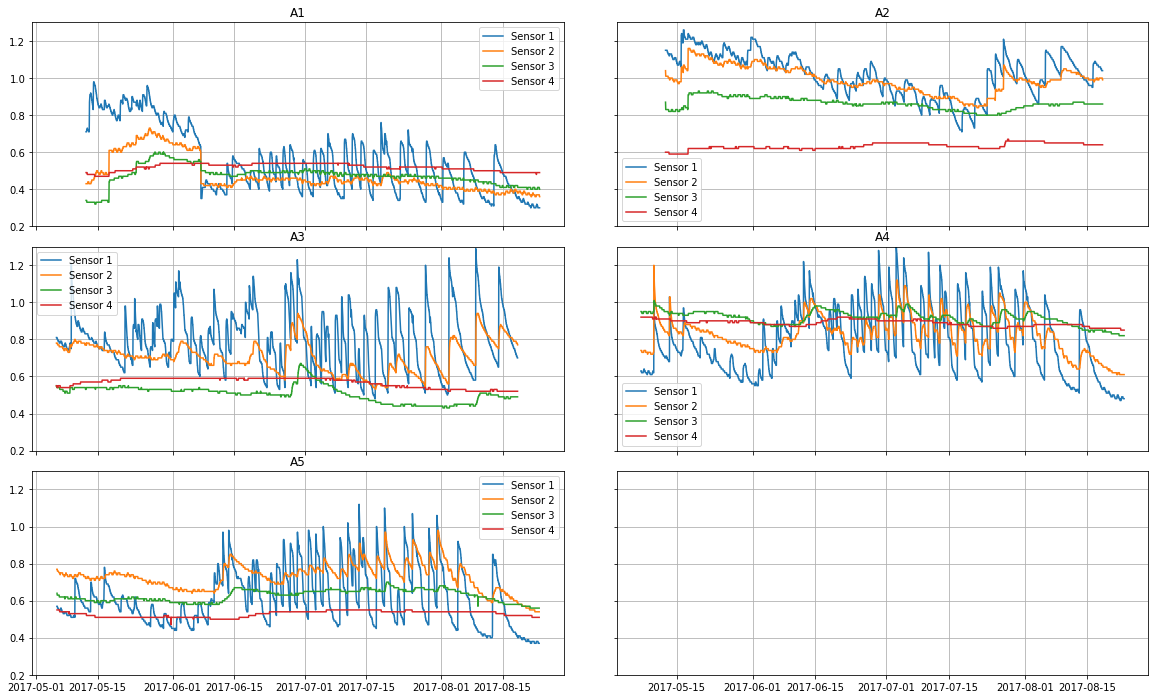

In [85]:
fig, axs = plt.subplots(3, 2, figsize=(20,12),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs;
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True); ax5.grid(True); ax6.grid(True);

ax1.plot(A1.Date.values, A1.Sensor1.values, label="Sensor 1")
ax1.plot(A1.Date.values, A1.Sensor2.values, label="Sensor 2")
ax1.plot(A1.Date.values, A1.Sensor3.values, label="Sensor 3")
ax1.plot(A1.Date.values, A1.Sensor4.values, label="Sensor 4")
ax1.legend(loc="best");
ax1.set_title("A1");
ax1.ylim = (0, 1.2)
ax1.set_ylim([0.2, 1.3])

ax2.plot(A2.Date.values, A2.Sensor1.values, label="Sensor 1")
ax2.plot(A2.Date.values, A2.Sensor2.values, label="Sensor 2")
ax2.plot(A2.Date.values, A2.Sensor3.values, label="Sensor 3")
ax2.plot(A2.Date.values, A2.Sensor4.values, label="Sensor 4")
ax2.legend(loc="best");
ax2.set_title("A2");
ax2.set_ylim([0.2, 1.3])

ax3.plot(A3.Date.values, A3.Sensor1.values, label="Sensor 1")
ax3.plot(A3.Date.values, A3.Sensor2.values, label="Sensor 2")
ax3.plot(A3.Date.values, A3.Sensor3.values, label="Sensor 3")
ax3.plot(A3.Date.values, A3.Sensor4.values, label="Sensor 4")
ax3.legend(loc="best");
ax3.set_title("A3");
ax3.set_ylim([0.2, 1.3])

ax4.plot(A4.Date.values, A4.Sensor1.values, label="Sensor 1")
ax4.plot(A4.Date.values, A4.Sensor2.values, label="Sensor 2")
ax4.plot(A4.Date.values, A4.Sensor3.values, label="Sensor 3")
ax4.plot(A4.Date.values, A4.Sensor4.values, label="Sensor 4")
ax4.legend(loc="best");
ax4.set_title("A4");
ax4.set_ylim([0.2, 1.3])

ax5.plot(A5.Date.values, A5.Sensor1.values, label = "Sensor 1")
ax5.plot(A5.Date.values, A5.Sensor2.values, label = "Sensor 2")
ax5.plot(A5.Date.values, A5.Sensor3.values, label = "Sensor 3")
ax5.plot(A5.Date.values, A5.Sensor4.values, label = "Sensor 4")
ax5.legend(loc="best");
ax5.set_title("A5");
ax5.set_ylim([0.2, 1.3])


# A3.plot(x='Date', y = 'Sensor1', legend = "Sensor1", ax=ax1);

# axs[0].bar(names, values)
# axs[1].scatter(names, values)
# axs[2].plot(names, values)
# fig.suptitle('Title here');

file_name = data_dir + "sensor_readings.png"
plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
plt.show()

# CLEANED (3) Station ABC Weather Data 2017 file

In [87]:
file_names

['ABC_Correct.xlsx',
 'CLEANED (3) Real Time Soil Moisture data_Field A1.xlsx',
 'CLEANED (3) Real Time Soil Moisture data_Field A2.xlsx',
 'CLEANED (3) Real Time Soil Moisture data_Field A3.xlsx',
 'CLEANED (3) Real Time Soil Moisture data_Field A4.xlsx',
 'CLEANED (3) Real Time Soil Moisture data_Field A5.xlsx']

In [88]:
# file_names[0]
ABC_2016_2017 = oc.read_ABC_weather_XLSfile(an_add_fileName = data_dir + 
                                            "CLEANED (3) Station ABC Weather Data 2017.xlsx")

In [89]:
ABC_2016_2017.head(2)

,Date,Max Temp (F),Min Temp (F),Average Temp (F),Dew Point,Rain (Inch),Wind (Miles),Solar (rad),ETp,GDD,Unnamed: 10
0,2016-01-11 00:00:00,63,41,52,43,0,99,303,0.07,6.35,NaN
1,2016-02-11 00:00:00,64,41,53,44,0,28,272,0.05,7.15,NaN


In [90]:
harvest_sample_2017_name = "CLEANED(2) 2017 Red Onion Harvest Samples.xlsx"
A = pd.read_excel(io=data_dir + harvest_sample_2017_name, header = 0)

In [91]:
harvest_sample_2017 = oc.read_xlsx_with_only_1sheet(path_n_fileName= data_dir + harvest_sample_2017_name, 
                                                    head_count = 0)
harvest_sample_2017.sort_values(by = ['Field code', 'Date'], inplace=True)

In [92]:
harvest_sample_2017.columns

Index(['Date', 'SampleDate', 'LocationCode', 'Type', 'SampleType', 'SampleID',
       'Item No', 'Color', 'Field code', 'Cultivar/ Variety code',
       'TotalSampledOnions', 'TotalSizedOnions', 'PackOut', 'Medium1',
       'Jumbo1', 'Jumbo1Percent', 'Colossal1', 'Medium2', 'Jumbo2',
       'Colossal2', 'Medium', 'MediumPercent', 'Jumbo', 'JumboPercent',
       'Colossal', 'ColossalPercent', 'TotalCutOnions', 'SingleCenter',
       'SingleCenterPercent', 'TotalDefects', 'Mold', 'MoldPercent',
       'OffColor', 'OffColorPercent', 'ExtDecay', 'ExtDecayPercent',
       'IntDecay', 'IntDecayPercent', 'Translucent', 'TranslucentPercent',
       'ExtSprout', 'ExtSproutPercent', 'IntSprout', 'IntSproutPercent',
       'Freeze', 'FreezePercent', 'SeedStem', 'SeedStemPercent', 'SunScald',
       'SunScaldPercent', 'SourSkin', 'SourSkinPercent', 'Doubles',
       'DoublesPercent', 'Splits', 'SplitsPercent', 'Bursts', 'BurstsPercent',
       'BlownBottom', 'BlownBottomPercent', 'MechDamage', 'Me

In [93]:
harvest_sample_2017.head(2)

,Date,SampleDate,LocationCode,Type,SampleType,SampleID,Item No,Color,Field code,Cultivar/ Variety code,...,MisShapedPercent,TranslucentScales,TranslucentScalesPercent,BlackMold,BlackMoldPercent,Peelers,PeelersPercent,OtherDefects,OtherDefectsPercent,LoadWeight
0,2017-09-07,2017-09-07,NaN,INT,FIELD,NaN,RED-ST,RED,A1,A_C01,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,64360
1,2017-09-08,2017-09-07,NaN,INT,FIELD,NaN,RED-ST,RED,A1,A_C01,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,57720


# Plan for this cell on:

   **Make the monthly data points:**
   - Read Cleaned 3 Farm A irrigation Applied 2017
   - Read Station ABC
   - Create a dataframe using them
   - Read the file with decay in it at harvest time.
   - Apply PCA to dataframe and pick the top 1 or 2 components to explore.
   
#### Do we need to produce something similar to accumulated GDD for solar or any other variable?
   

In [98]:
python_data_dir = data_dir + "Clean_For_Python/"
python_data_dir

'/Users/hn/Documents/01_research_data/Stop_the_Rot/files_from_team/Columbia_Basin_Farm_A_red_onion_data/Clean_For_Python/'

In [99]:
clean_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/Clean_For_Python/"

### ABC_weather

  - ABC weather includes variables `[Max Temp, Max Temp, Avg Temp, Dew Point, Rain, Wind, Solar, ETp, GDD]`.
    Use them to creafe monthly data:
 1. `Monthly average temp`
 2. `monthly average dew` 
 3. `cumulative rain`
 4. `cumulative GDD`


In [100]:
ABC_2016_2017 = oc.read_ABC_weather_XLSfile(an_add_fileName = clean_dir + "ABC_Correct.xlsx",
                                            header_rows = 1, 
                                            skip_Rows = 3)

# We have to do this next step since we updated the damn Pandas

In [102]:
ABC_2016_2017['Date'] = pd.to_datetime(ABC_2016_2017.Date, format='%Y-%m-%d %H:%M:%S')
ABC_2016_2017['Date'] = ABC_2016_2017['Date'].dt.strftime('%Y-%m-%d')
ABC_2016_2017['Date'] = pd.to_datetime(ABC_2016_2017.Date, format='%Y-%m-%d')

In [103]:
ABC_2016_2017['month'] = ABC_2016_2017['Date'].dt.month
ABC_2016_2017['year'] = ABC_2016_2017['Date'].dt.year
ABC_2016_2017.head(15)

,Date,Max Temp (F),Min Temp (F),Average Temp (F),Dew Point,Rain (Inch),Wind (Miles),Solar (rad),ETp,GDD,Unnamed: 10,month,year
0,2016-11-01,63,41,52,43,0,99,303,0.07,6.35,NaN,11,2016
1,2016-11-02,64,41,53,44,0,28,272,0.05,7.15,NaN,11,2016
2,2016-11-03,64,43,54,46,0,39,244,0.05,7.05,NaN,11,2016
3,2016-11-04,62,40,51,45,0,35,277,0.05,5.95,NaN,11,2016
4,2016-11-05,57,39,48,45,0,24,179,0.04,3.55,NaN,11,2016
5,2016-11-06,64,45,55,45,0.07,82,279,0.06,7.10,NaN,11,2016
6,2016-11-07,62,41,52,45,0,25,219,0.04,6.05,NaN,11,2016
7,2016-11-08,79,42,60,46,0,34,260,0.05,14.40,NaN,11,2016
8,2016-11-09,64,41,52,46,0,29,255,0.05,6.75,NaN,11,2016
9,2016-11-10,58,40,49,46,0,33,229,0.04,3.95,NaN,11,2016


In [104]:
ABC_2016_2017.Date[1].year

2016

In [105]:
#
# convert all columns to numeric, so we can use groupby operations.
#
oc.convert_to_numerictype(ABC_2016_2017, ABC_2016_2017.columns[1:9])


In [106]:
ABC_2016_2017.head(2)

,Date,Max Temp (F),Min Temp (F),Average Temp (F),Dew Point,Rain (Inch),Wind (Miles),Solar (rad),ETp,GDD,Unnamed: 10,month,year
0,2016-11-01,63,41,52,43.0,0.0,99,303,0.07,6.35,NaN,11,2016
1,2016-11-02,64,41,53,44.0,0.0,28,272,0.05,7.15,NaN,11,2016


In [107]:
# ABC_2016_2017.drop(['Date'], axis=1, inplace=True)
ABC_2016_2017.GDD = ABC_2016_2017.GDD.astype(float)

In [108]:
# for ii in np.arange(len(ABC_2016_2017.GDD)):
#     if type(ABC_2016_2017.GDD[ii]) != float:
#         print (ii)
#         print (ABC_2016_2017.iloc[ii])
#         print (type(ABC_2016_2017.GDD[ii]) )


In [109]:
mean_dataF = oc.group_by_compute_stats(a_dataF = ABC_2016_2017, 
                                       stat = 'mean', 
                                       stat_columns = ['Average Temp (F)', 'Dew Point', 'Wind (Miles)'], 
                                       group_by_cols = ['year', 'month'])

In [110]:
cumSum_dataF = oc.group_by_compute_stats(a_dataF = ABC_2016_2017, 
                                         stat = 'sum', 
                                         stat_columns = ['GDD', 'Rain (Inch)'], 
                                         group_by_cols = ['year', 'month'])

In [111]:
processed_table = pd.merge(left = cumSum_dataF, right = mean_dataF, how='left', on = ['year', 'month'])
processed_table

,year,month,GDD_cumulative_sum,Rain (Inch)_cumulative_sum,Average Temp (F)_averages,Dew Point_averages,Wind (Miles)_averages
0,2016,11,109.20,0.46,47.633333,40.500000,91.400000
1,2016,12,1.35,0.72,28.225806,23.166667,91.548387
2,2017,1,0.00,1.00,22.709677,18.571429,60.387097
3,2017,2,0.00,1.60,32.535714,25.642857,78.535714
4,2017,3,96.65,1.24,47.258065,36.000000,129.967742
5,2017,4,208.15,1.32,52.300000,38.833333,184.266667
6,2017,5,407.95,1.79,61.645161,45.935484,126.709677
7,2017,7,764.35,0.00,78.419355,49.806452,139.516129
8,2017,8,714.30,0.07,76.612903,53.870968,84.354839
9,2017,10,223.00,0.58,51.709677,40.193548,119.612903


# Cleaned 3 Farm A irrigation Applied 2017

In [112]:
dd = "/Users/hn/Documents/01_research_data/Stop_the_Rot/Clean_For_Python/"
irrigation_fileN = "CLEANED (3) Farm A Irrigation Applied 2017 selected fields_Python.xlsx"

In [113]:
xl = pd.ExcelFile(dd + irrigation_fileN)
EX_sheet_names = xl.sheet_names
EX_sheet_names

['(clean) Year Summary', '(clean) Hours of operation']

In [114]:
Irrigation_2017 = pd.read_excel(io = dd + irrigation_fileN, 
                                header = 0, 
                                sheet_name = "(clean) Year Summary", 
                                skiprows = 0)
Irrigation_2017.shape

(140, 7)

In [115]:
ii=2
print (Irrigation_2017.Date[ii])
print (pd.to_datetime(Irrigation_2017.Date[ii]).month)
print (pd.to_datetime(Irrigation_2017.Date[ii]).day)

Irrigation_2017.Date[20]
print (pd.to_datetime(Irrigation_2017.Date[20]).month)

2017-03-08 00:00:00
3
8
7


In [116]:
Irrigation_2017.head(2)

,Field,Acres,Date,GPM High,irrig_inch,irrig_hour,Harvest Dates
0,A1,125.3,2017-02-22,939.75,NaN,NaN,2017-09-07
1,A1,125.3,2017-03-01,939.75,0.397702,24.0,2017-09-07


# replace NAs with zeros

In [117]:
Irrigation_2017_NA_0 = Irrigation_2017.copy()
Irrigation_2017_NA_0.sort_values(by = 'Date', inplace=True)
Irrigation_2017_NA_0['irrig_inch'] = Irrigation_2017_NA_0['irrig_inch'].fillna(0)


In [118]:
Irrigation_2017_NA_0['irr_cum_sum'] = Irrigation_2017_NA_0.groupby(['Field'])['irrig_inch'].cumsum()

In [119]:
# Irrigation_2017[Irrigation_2017['irrig_inch'].isnull()]

In [120]:
Irrigation_2017_NA_0.head(3)

,Field,Acres,Date,GPM High,irrig_inch,irrig_hour,Harvest Dates,irr_cum_sum
0,A1,125.3,2017-02-22,939.75,0.0,NaN,2017-09-07,0.0
28,A2,128.3,2017-02-22,1026.40,0.0,0.0,2017-09-06,0.0
112,A4,120.0,2017-02-22,900.00,0.0,NaN,2017-09-13,0.0


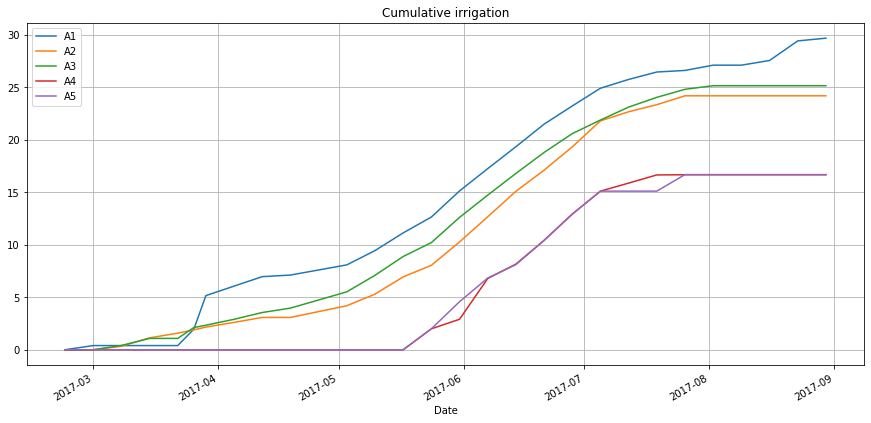

In [121]:
df = Irrigation_2017_NA_0.copy();

fig, ax = plt.subplots(figsize=(15,7))

df.set_index('Date', inplace=True);
df.groupby('Field')['irr_cum_sum'].plot(legend=True);

ax.grid(True);
ax.set_title("Cumulative irrigation");


file_name = python_data_dir + "Cumulative_irrigation.png"
# plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
plt.show()

   - **A1**: Apr 1 - Sep 6
   - **A2**: Mar 25 - Sep 6
   - **A3**: Mar 15 - Sep 13
   - **A4**: Mar 21 - Sep 15
   - **A5**: Mar 16 - Sep 23

In [122]:
planting_dates = [datetime.date(2017, 4, 1),
                  datetime.date(2017, 3, 25),
                  datetime.date(2017, 3, 15),
                  datetime.date(2017, 3, 21),
                  datetime.date(2017, 3, 16)]

harvesting_dates = [datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 13),
                    datetime.date(2017, 9, 15),
                    datetime.date(2017, 9, 23)]

field_names = ['A1', 'A2', 'A3', 'A4', 'A5']

data1 = {'field_names': field_names, 'planting dates': planting_dates, 'harvesting dates': harvesting_dates}

Planting_and_Harvesting_dates = pd.DataFrame(data1)

In [123]:
planting_dates = [datetime.date(2017, 4, 1),
                  datetime.date(2017, 3, 25),
                  datetime.date(2017, 3, 15),
                  datetime.date(2017, 3, 21),
                  datetime.date(2017, 3, 16)]

harvesting_dates = [datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 13),
                    datetime.date(2017, 9, 15),
                    datetime.date(2017, 9, 23)]

field_names = ['A1', 'A2', 'A3', 'A4', 'A5']

planting_table = {'Field': field_names, 'planting dates': planting_dates, 'harvesting dates': harvesting_dates}
planting_table = {'Field': field_names, 'planting dates': planting_dates, 'harvesting dates': harvesting_dates}

Planting_and_Harvesting_dates = pd.DataFrame(data1)

In [46]:
# df = Irrigation_2017_NA_0.copy();

# fig, ax = plt.subplots(figsize=(15,7))

# df.set_index('Date', inplace=True);
# df.groupby('Field')['irr_cum_sum'].plot(legend=True);

# # add planting dots
# plt.scatter(x = Planting_and_Harvesting_dates.loc[0, 'planting dates'], y = 5.7, linewidths=3)
# plt.scatter(x = Planting_and_Harvesting_dates.loc[1, 'planting dates'], y = 2, linewidths=3)
# plt.scatter(x = Planting_and_Harvesting_dates.loc[2, 'planting dates'], y = 1.2, linewidths=3)
# plt.scatter(x = Planting_and_Harvesting_dates.loc[3, 'planting dates'], y = 0, linewidths=3)
# plt.scatter(x = Planting_and_Harvesting_dates.loc[4, 'planting dates'], y = 0, linewidths=3)

# plt.scatter(x = Planting_and_Harvesting_dates.loc[0, 'harvesting dates'], 
#             y = 29.5, 
#             linewidths=3, 
#             c = 'cornflowerblue')

# plt.scatter(x = Planting_and_Harvesting_dates.loc[1, 'harvesting dates'], 
#             y = 24.2, 
#             linewidths=3, 
#             c = 'orange')

# plt.scatter(x = Planting_and_Harvesting_dates.loc[2, 'harvesting dates'], 
#             y = 25, 
#             linewidths=3, 
#             c = 'green')

# plt.scatter(x = Planting_and_Harvesting_dates.loc[3, 'harvesting dates'], 
#             y = 17, 
#             linewidths=3, 
#             c = 'red')

# plt.scatter(x = Planting_and_Harvesting_dates.loc[4, 'harvesting dates'], 
#             y = 17, 
#             linewidths=3, 
#             c = 'purple')

# ax.grid(True);
# ax.set_title("Cumulative irrigation (dots are planting and harvesting dates)");


# file_name = python_data_dir + "Cumulative_irrigation_wPantingHarvesting.png"
# plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
# plt.show()

In [124]:
planting_dates = [datetime.date(2017, 4, 1),
                  datetime.date(2017, 3, 25),
                  datetime.date(2017, 3, 15),
                  datetime.date(2017, 3, 21),
                  datetime.date(2017, 3, 16)]

planting_y = [5.7, 2, 1.2, 0, 0]

harvesting_dates = [datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 13),
                    datetime.date(2017, 9, 15),
                    datetime.date(2017, 9, 23)]

harvesting_y = [29.5, 24.2, 25, 17, 17]

field_names = ['A1', 'A2', 'A3', 'A4', 'A5']

colors = ['cornflowerblue', 'orange', 'green', 'red', 'purple']

planting_table = {'Field': field_names, 'planting dates': planting_dates, 'y': planting_y, 'colors':colors}
harvesting_table = {'Field': field_names, 'harvesting dates': harvesting_dates, 'y': harvesting_y, 'colors':colors}

planting_table = pd.DataFrame(planting_table)
harvesting_table = pd.DataFrame(harvesting_table)

planting_table.sort_values(by = 'planting dates', inplace=True)
harvesting_table.sort_values(by = 'harvesting dates', inplace=True)

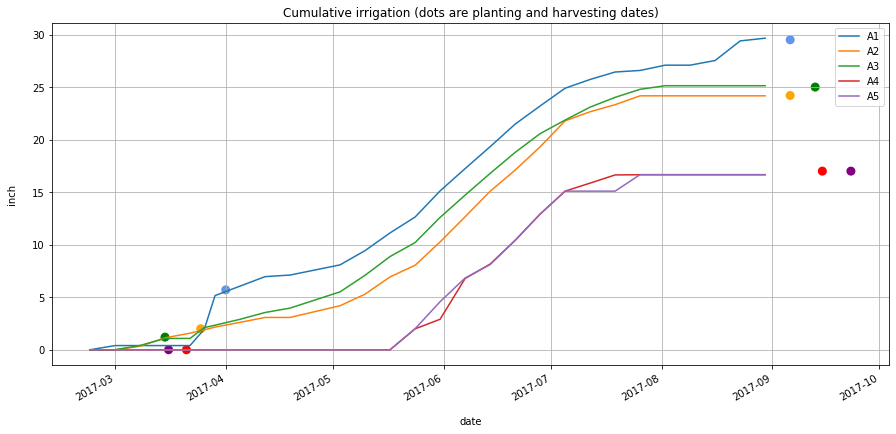

In [125]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
          'axes.labelsize': 24, # changes date (a), (b), (c), (d) on x-axis, EVI, NDVI on y axis. 
                               # The smaller this number the bigger the labels!!
          'axes.titlesize': 24, # changes titles, bean dry for example. 
                               # This line and the one above are connected, problematic
          'xtick.labelsize':15,
          'ytick.labelsize':15
         }


df = Irrigation_2017_NA_0.copy();

fig, ax = plt.subplots(figsize=(15,7))

df.set_index('Date', inplace=True);
df.groupby('Field')['irr_cum_sum'].plot(legend=True);

# add planting dots
plt.scatter(x = planting_table['planting dates'], 
            y = planting_table['y'], 
            linewidths=3, 
            c = planting_table.colors)

plt.scatter(x = harvesting_table['harvesting dates'], 
            y = harvesting_table['y'], 
            linewidths=3,
            c = harvesting_table.colors)

ax.set(xlabel = 'date', ylabel = 'inch')
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15


ax.grid(True);
ax.set_title("Cumulative irrigation (dots are planting and harvesting dates)");

file_name = dd + "Cumulative_irrigation_wPantingHarvesting_2.png"
# plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
plt.show()

'/Users/hn/Documents/01_research_data/Stop_the_Rot/Clean_For_Python/'